# ECS 171 Group Project: Heart Disease Detection

In [1]:
# import modules and mount google drive for google colab
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# open dataset as dataframe
df = pd.read_csv("/content/drive/Shared drives/ECS171 Group Project Team 11/heart_2020_cleaned.csv")

# reorder columns
df = df[[
    'HeartDisease',	
    'BMI',
    'PhysicalHealth',
    'MentalHealth',
    'SleepTime',
    'Smoking',
    'AlcoholDrinking',
    'Stroke',
    'DiffWalking',
    'Sex',
    'PhysicalActivity',	
    'Asthma',	
    'KidneyDisease',	
    'SkinCancer',
    'AgeCategory',
    'Race',	
    'Diabetic',	
    'GenHealth',
]]

print(df.shape)
df.head()

(319795, 18)


,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,AgeCategory,Race,Diabetic,GenHealth
0,No,16.60,3.0,30.0,5.0,Yes,No,No,No,Female,Yes,Yes,No,Yes,55-59,White,Yes,Very good
1,No,20.34,0.0,0.0,7.0,No,No,Yes,No,Female,Yes,No,No,No,80 or older,White,No,Very good
2,No,26.58,20.0,30.0,8.0,Yes,No,No,No,Male,Yes,Yes,No,No,65-69,White,Yes,Fair
3,No,24.21,0.0,0.0,6.0,No,No,No,No,Female,No,No,No,Yes,75-79,White,No,Good
4,No,23.71,28.0,0.0,8.0,No,No,No,Yes,Female,Yes,No,No,No,40-44,White,No,Very good


# Exploratory Data Analysis

In [ ]:
# Numerical attributes statistics
columns = [
    'BMI',
    'PhysicalHealth',
    'MentalHealth',
    'SleepTime'
]
df[columns].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


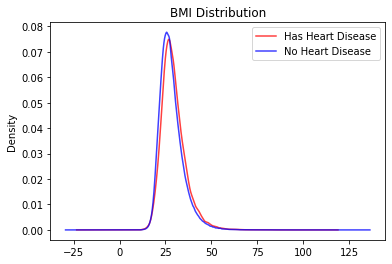


### BMI statistics of people with Heart Disease ###


count    27373.000000
mean        29.401592
std          6.577151
min         12.210000
25%         25.060000
50%         28.340000
75%         32.690000
max         83.330000
Name: Has Heart Disease, dtype: float64


### BMI statistics of people with no Heart Disease ###


count    292422.000000
mean         28.224658
std           6.325660
min          12.020000
25%          23.890000
50%          27.260000
75%          31.320000
max          94.850000
Name: No Heart Disease, dtype: float64

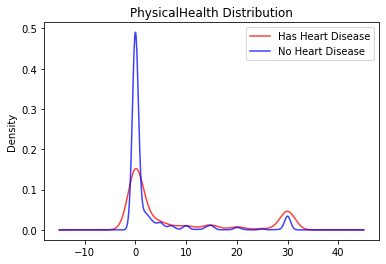


### PhysicalHealth statistics of people with Heart Disease ###


count    27373.000000
mean         7.808242
std         11.487819
min          0.000000
25%          0.000000
50%          0.000000
75%         15.000000
max         30.000000
Name: Has Heart Disease, dtype: float64


### PhysicalHealth statistics of people with no Heart Disease ###


count    292422.000000
mean          2.956416
std           7.400378
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          30.000000
Name: No Heart Disease, dtype: float64

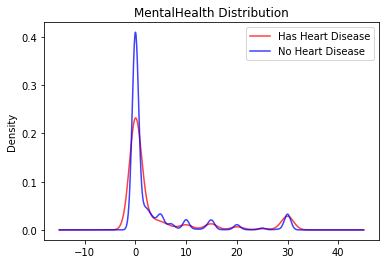


### MentalHealth statistics of people with Heart Disease ###


count    27373.000000
mean         4.641764
std          9.171932
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max         30.000000
Name: Has Heart Disease, dtype: float64


### MentalHealth statistics of people with no Heart Disease ###


count    292422.000000
mean          3.828778
std           7.828079
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: No Heart Disease, dtype: float64

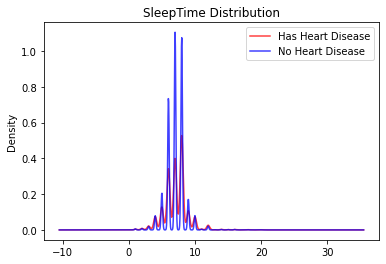


### SleepTime statistics of people with Heart Disease ###


count    27373.000000
mean         7.136156
std          1.780863
min          1.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         24.000000
Name: Has Heart Disease, dtype: float64


### SleepTime statistics of people with no Heart Disease ###


count    292422.000000
mean          7.093416
std           1.399331
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: No Heart Disease, dtype: float64

In [ ]:
# Numerical attributes distribution with respect to Heart Disease
columns = [
    'BMI',
    'PhysicalHealth',
    'MentalHealth',
    'SleepTime'
]

for col in columns:
    # seperate attribute by Heart Disease
    yes = df[df['HeartDisease']=='Yes'][col].rename("Has Heart Disease")
    no = df[df['HeartDisease']=='No'][col].rename("No Heart Disease")

    # plot probability distributions
    yes.plot(kind='kde', color='r', alpha=0.75, legend=True, title = f'{col} Distribution', xlabel=col)
    no.plot(kind='kde', color='b', alpha=0.75, legend=True)
    plt.show()
    print()

    print(f"### {col} statistics of people with Heart Disease ###")
    display(yes.describe())
    print()
    
    print(f"### {col} statistics of people with no Heart Disease ###")
    display(no.describe())
    print()

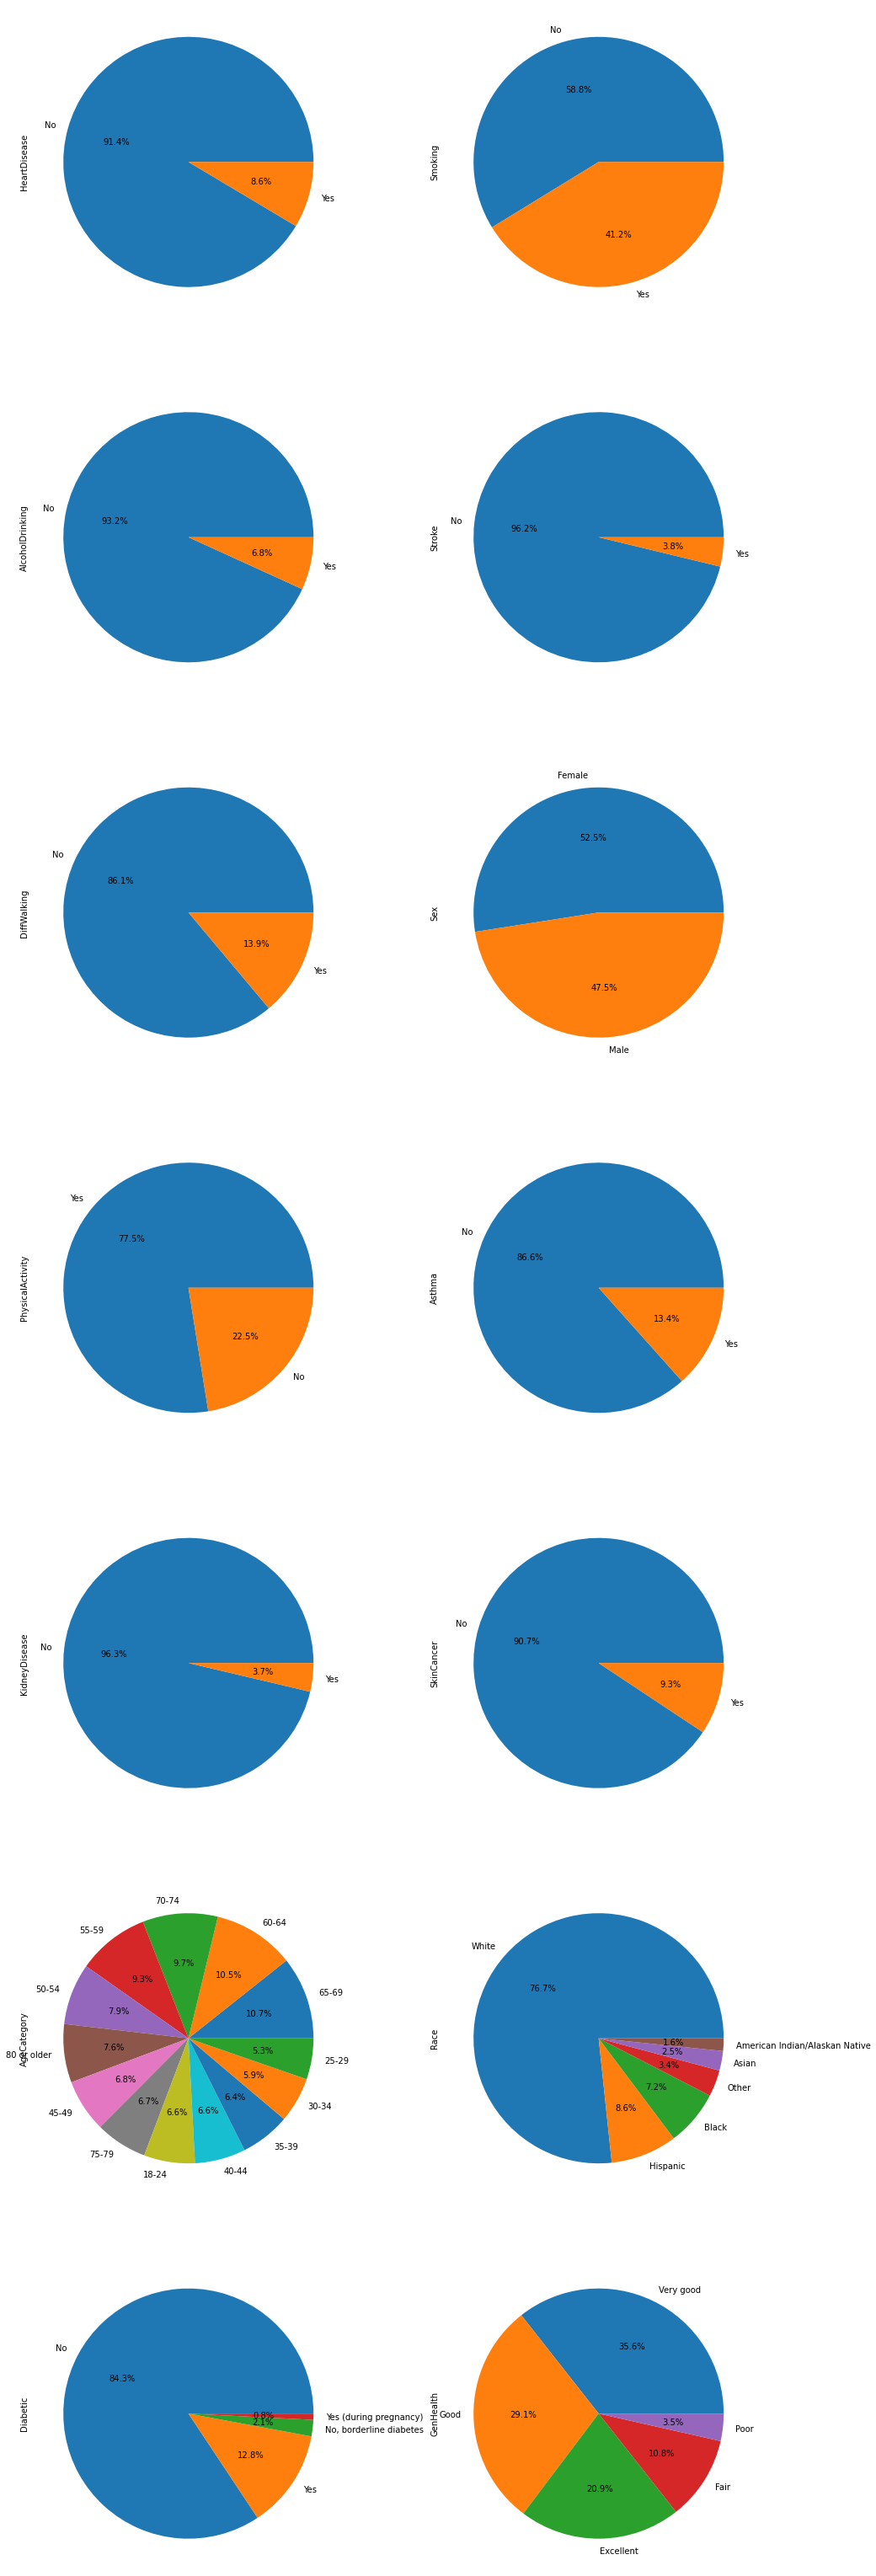

In [ ]:
# Categorical attributes frequency Pie charts
columns = [
    'HeartDisease',	
    'Smoking',
    'AlcoholDrinking',
    'Stroke',
    'DiffWalking',
    'Sex',
    'PhysicalActivity',	
    'Asthma',	
    'KidneyDisease',	
    'SkinCancer',
    'AgeCategory',
    'Race',	
    'Diabetic',	
    'GenHealth'
]
for i in range(len(columns)):
    plt.subplot(7,2,i+1)
    df[columns[i]].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(16, 56))

plt.show()

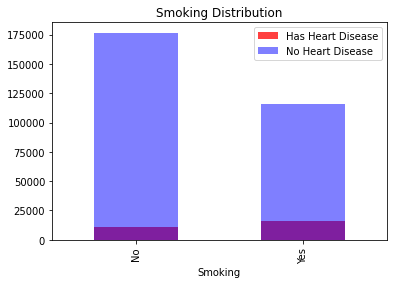


Probability of Heart Disease if you put No in Smoking: 6.03%
Probability of Heart Disease if you put Yes in Smoking: 12.16%



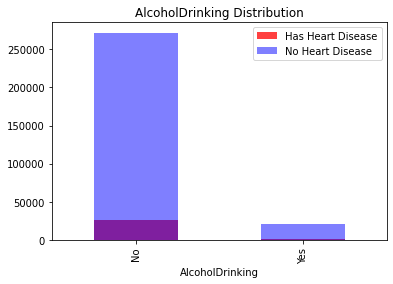


Probability of Heart Disease if you put No in AlcoholDrinking: 8.80%
Probability of Heart Disease if you put Yes in AlcoholDrinking: 5.24%



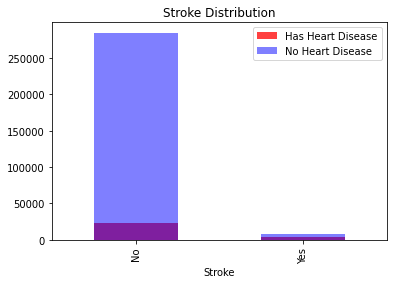


Probability of Heart Disease if you put No in Stroke: 7.47%
Probability of Heart Disease if you put Yes in Stroke: 36.37%



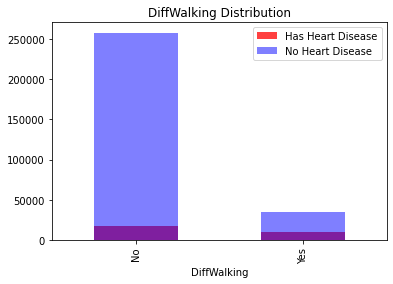


Probability of Heart Disease if you put No in DiffWalking: 6.30%
Probability of Heart Disease if you put Yes in DiffWalking: 22.58%



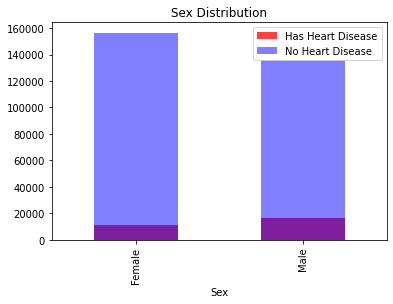


Probability of Heart Disease if you put Female in Sex: 6.69%
Probability of Heart Disease if you put Male in Sex: 10.62%



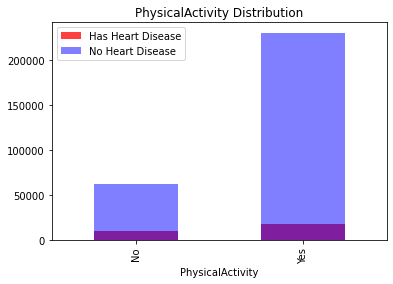


Probability of Heart Disease if you put No in PhysicalActivity: 13.76%
Probability of Heart Disease if you put Yes in PhysicalActivity: 7.05%



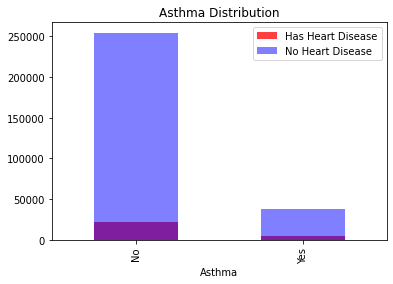


Probability of Heart Disease if you put No in Asthma: 8.10%
Probability of Heart Disease if you put Yes in Asthma: 11.51%



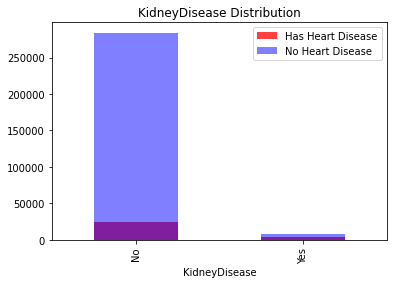


Probability of Heart Disease if you put No in KidneyDisease: 7.77%
Probability of Heart Disease if you put Yes in KidneyDisease: 29.33%



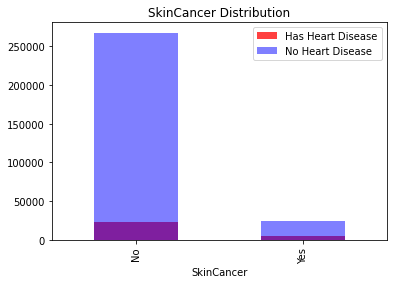


Probability of Heart Disease if you put No in SkinCancer: 7.72%
Probability of Heart Disease if you put Yes in SkinCancer: 16.70%



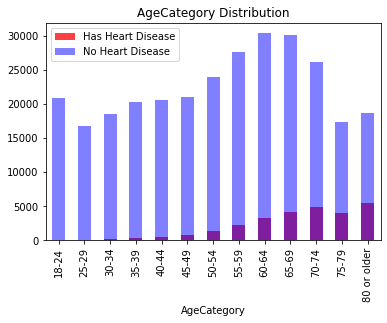


Probability of Heart Disease if you put 18-24 in AgeCategory: 0.62%
Probability of Heart Disease if you put 25-29 in AgeCategory: 0.78%
Probability of Heart Disease if you put 30-34 in AgeCategory: 1.21%
Probability of Heart Disease if you put 35-39 in AgeCategory: 1.44%
Probability of Heart Disease if you put 40-44 in AgeCategory: 2.31%
Probability of Heart Disease if you put 45-49 in AgeCategory: 3.41%
Probability of Heart Disease if you put 50-54 in AgeCategory: 5.45%
Probability of Heart Disease if you put 55-59 in AgeCategory: 7.40%
Probability of Heart Disease if you put 60-64 in AgeCategory: 9.88%
Probability of Heart Disease if you put 65-69 in AgeCategory: 12.01%
Probability of Heart Disease if you put 70-74 in AgeCategory: 15.60%
Probability of Heart Disease if you put 75-79 in AgeCategory: 18.85%
Probability of Heart Disease if you put 80 or older in AgeCategory: 22.56%



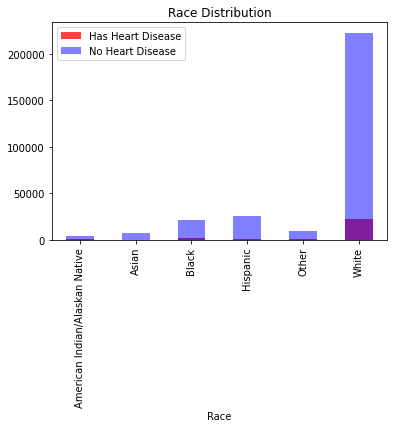


Probability of Heart Disease if you put American Indian/Alaskan Native in Race: 10.42%
Probability of Heart Disease if you put Asian in Race: 3.30%
Probability of Heart Disease if you put Black in Race: 7.54%
Probability of Heart Disease if you put Hispanic in Race: 5.26%
Probability of Heart Disease if you put Other in Race: 8.11%
Probability of Heart Disease if you put White in Race: 9.18%



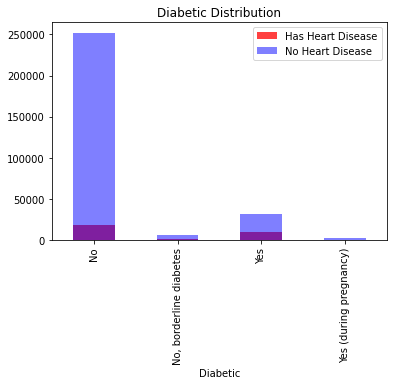


Probability of Heart Disease if you put No in Diabetic: 6.50%
Probability of Heart Disease if you put No, borderline diabetes in Diabetic: 11.64%
Probability of Heart Disease if you put Yes in Diabetic: 21.95%
Probability of Heart Disease if you put Yes (during pregnancy) in Diabetic: 4.22%



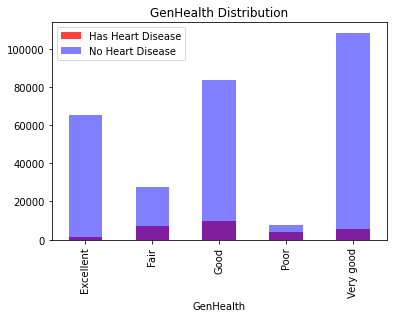


Probability of Heart Disease if you put Excellent in GenHealth: 2.24%
Probability of Heart Disease if you put Fair in GenHealth: 20.43%
Probability of Heart Disease if you put Good in GenHealth: 10.26%
Probability of Heart Disease if you put Poor in GenHealth: 34.10%
Probability of Heart Disease if you put Very good in GenHealth: 4.73%



In [ ]:
# Categorical attributes distribution with respect to Heart Disease

columns = [
    'Smoking',
    'AlcoholDrinking',
    'Stroke',
    'DiffWalking',
    'Sex',
    'PhysicalActivity',	
    'Asthma',	
    'KidneyDisease',	
    'SkinCancer',
    'AgeCategory',
    'Race',	
    'Diabetic',	
    'GenHealth'
]
for col in columns:

    # seperate attribute by Heart Disease
    yes = df[df['HeartDisease']=='Yes'][col].rename("Has Heart Disease").value_counts().sort_index(axis=0)
    no = df[df['HeartDisease']=='No'][col].rename("No Heart Disease").value_counts().sort_index(axis=0)
    total = df[col].value_counts().sort_index(axis=0)

    # plot histogram distributions
    yes.plot(kind='bar', color='r', alpha=0.75, legend=True, title = f'{col} Distribution', xlabel=col)
    no.plot(kind='bar', color='b', alpha=0.5, legend=True)
    plt.show()

    # print probability of heart disease with respect to each category
    print()
    for category in yes.index.tolist():
        prob = "{:.2%}".format(yes[category] / total[category])
        print(f"Probability of Heart Disease if you put {category} in {col}: {prob}")
    print()
    

# Data Preprocessing

In [3]:
# Analyze unique values and check for any errors
print(df.apply(lambda col: col.unique()))

HeartDisease                                                [No, Yes]
BMI                 [16.6, 20.34, 26.58, 24.21, 23.71, 28.87, 21.6...
PhysicalHealth      [3.0, 0.0, 20.0, 28.0, 6.0, 15.0, 5.0, 30.0, 7...
MentalHealth        [30.0, 0.0, 2.0, 5.0, 15.0, 8.0, 4.0, 3.0, 10....
SleepTime           [5.0, 7.0, 8.0, 6.0, 12.0, 4.0, 9.0, 10.0, 15....
Smoking                                                     [Yes, No]
AlcoholDrinking                                             [No, Yes]
Stroke                                                      [No, Yes]
DiffWalking                                                 [No, Yes]
Sex                                                    [Female, Male]
PhysicalActivity                                            [Yes, No]
Asthma                                                      [Yes, No]
KidneyDisease                                               [No, Yes]
SkinCancer                                                  [Yes, No]
AgeCategory         

In [4]:
# Check for any None or nan values
df.isin([None, float('nan')]).any(axis=0)

HeartDisease        False
BMI                 False
PhysicalHealth      False
MentalHealth        False
SleepTime           False
Smoking             False
AlcoholDrinking     False
Stroke              False
DiffWalking         False
Sex                 False
PhysicalActivity    False
Asthma              False
KidneyDisease       False
SkinCancer          False
AgeCategory         False
Race                False
Diabetic            False
GenHealth           False
dtype: bool

In [5]:
# Remove any columns with nan values
df = df.dropna()

# Replace Binary Columns No with 0
df.iloc[:,5:14] = df.iloc[:,5:14].replace('No', 0)
df['HeartDisease'] = df['HeartDisease'].replace('No', 0)

# Replace Binary Columns Yes with 1
df.iloc[:,5:14] = df.iloc[:,5:14].replace('Yes', 1)
df['HeartDisease'] = df['HeartDisease'].replace('Yes', 1)

# Rename Sex column to Female
df = df.rename({'Sex': 'Female'}, axis=1)

# Replace Male with 0, Female with 1, and some typo corrections
df = df.replace({
    'Female': {
        'Female': 1,
        'Male': 0
    },
    'Diabetic': {
        'No, borderline diabetes': 'No_borderline_diabetes',
        'Yes (during pregnancy)': 'Yes_during_pregnancy'
    },
    'Race': {
        'American Indian/Alaskan Native': 'American_Indian_or_Alaskan_Native'
    },
    'GenHealth': {
        'Very good': 'Very_good'
    }

})

df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Female,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,AgeCategory,Race,Diabetic,GenHealth
0,0,16.60,3.0,30.0,5.0,1,0,0,0,1,1,1,0,1,55-59,White,Yes,Very_good
1,0,20.34,0.0,0.0,7.0,0,0,1,0,1,1,0,0,0,80 or older,White,No,Very_good
2,0,26.58,20.0,30.0,8.0,1,0,0,0,0,1,1,0,0,65-69,White,Yes,Fair
3,0,24.21,0.0,0.0,6.0,0,0,0,0,1,0,0,0,1,75-79,White,No,Good
4,0,23.71,28.0,0.0,8.0,0,0,0,1,1,1,0,0,0,40-44,White,No,Very_good


In [6]:
# min-max normalization on numerical attributes
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df.iloc[:, 1:5] = scaler.fit_transform(df.iloc[:, 1:5])

df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Female,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,AgeCategory,Race,Diabetic,GenHealth
0,0,0.055294,0.100000,1.0,0.173913,1,0,0,0,1,1,1,0,1,55-59,White,Yes,Very_good
1,0,0.100447,0.000000,0.0,0.260870,0,0,1,0,1,1,0,0,0,80 or older,White,No,Very_good
2,0,0.175782,0.666667,1.0,0.304348,1,0,0,0,0,1,1,0,0,65-69,White,Yes,Fair
3,0,0.147169,0.000000,0.0,0.217391,0,0,0,0,1,0,0,0,1,75-79,White,No,Good
4,0,0.141132,0.933333,0.0,0.304348,0,0,0,1,1,1,0,0,0,40-44,White,No,Very_good


In [7]:
# Additional Preprocessing for Logistic Regression, SVM, Neural Network, Decision Trees
# One Hot Encoding

df_ohe = df.copy()
for col in ['AgeCategory', 'Race', 'Diabetic', 'GenHealth']:
    df_ohe = pd.concat([df_ohe, pd.get_dummies(df_ohe[col], prefix=f'{col}_')],axis=1).drop([col], axis=1)

df_ohe.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Female,...,Race__White,Diabetic__No,Diabetic__No_borderline_diabetes,Diabetic__Yes,Diabetic__Yes_during_pregnancy,GenHealth__Excellent,GenHealth__Fair,GenHealth__Good,GenHealth__Poor,GenHealth__Very_good
0,0,0.055294,0.100000,1.0,0.173913,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,0.100447,0.000000,0.0,0.260870,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,0.175782,0.666667,1.0,0.304348,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,0,0.147169,0.000000,0.0,0.217391,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
4,0,0.141132,0.933333,0.0,0.304348,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1


# Additional Exploratory Analysis

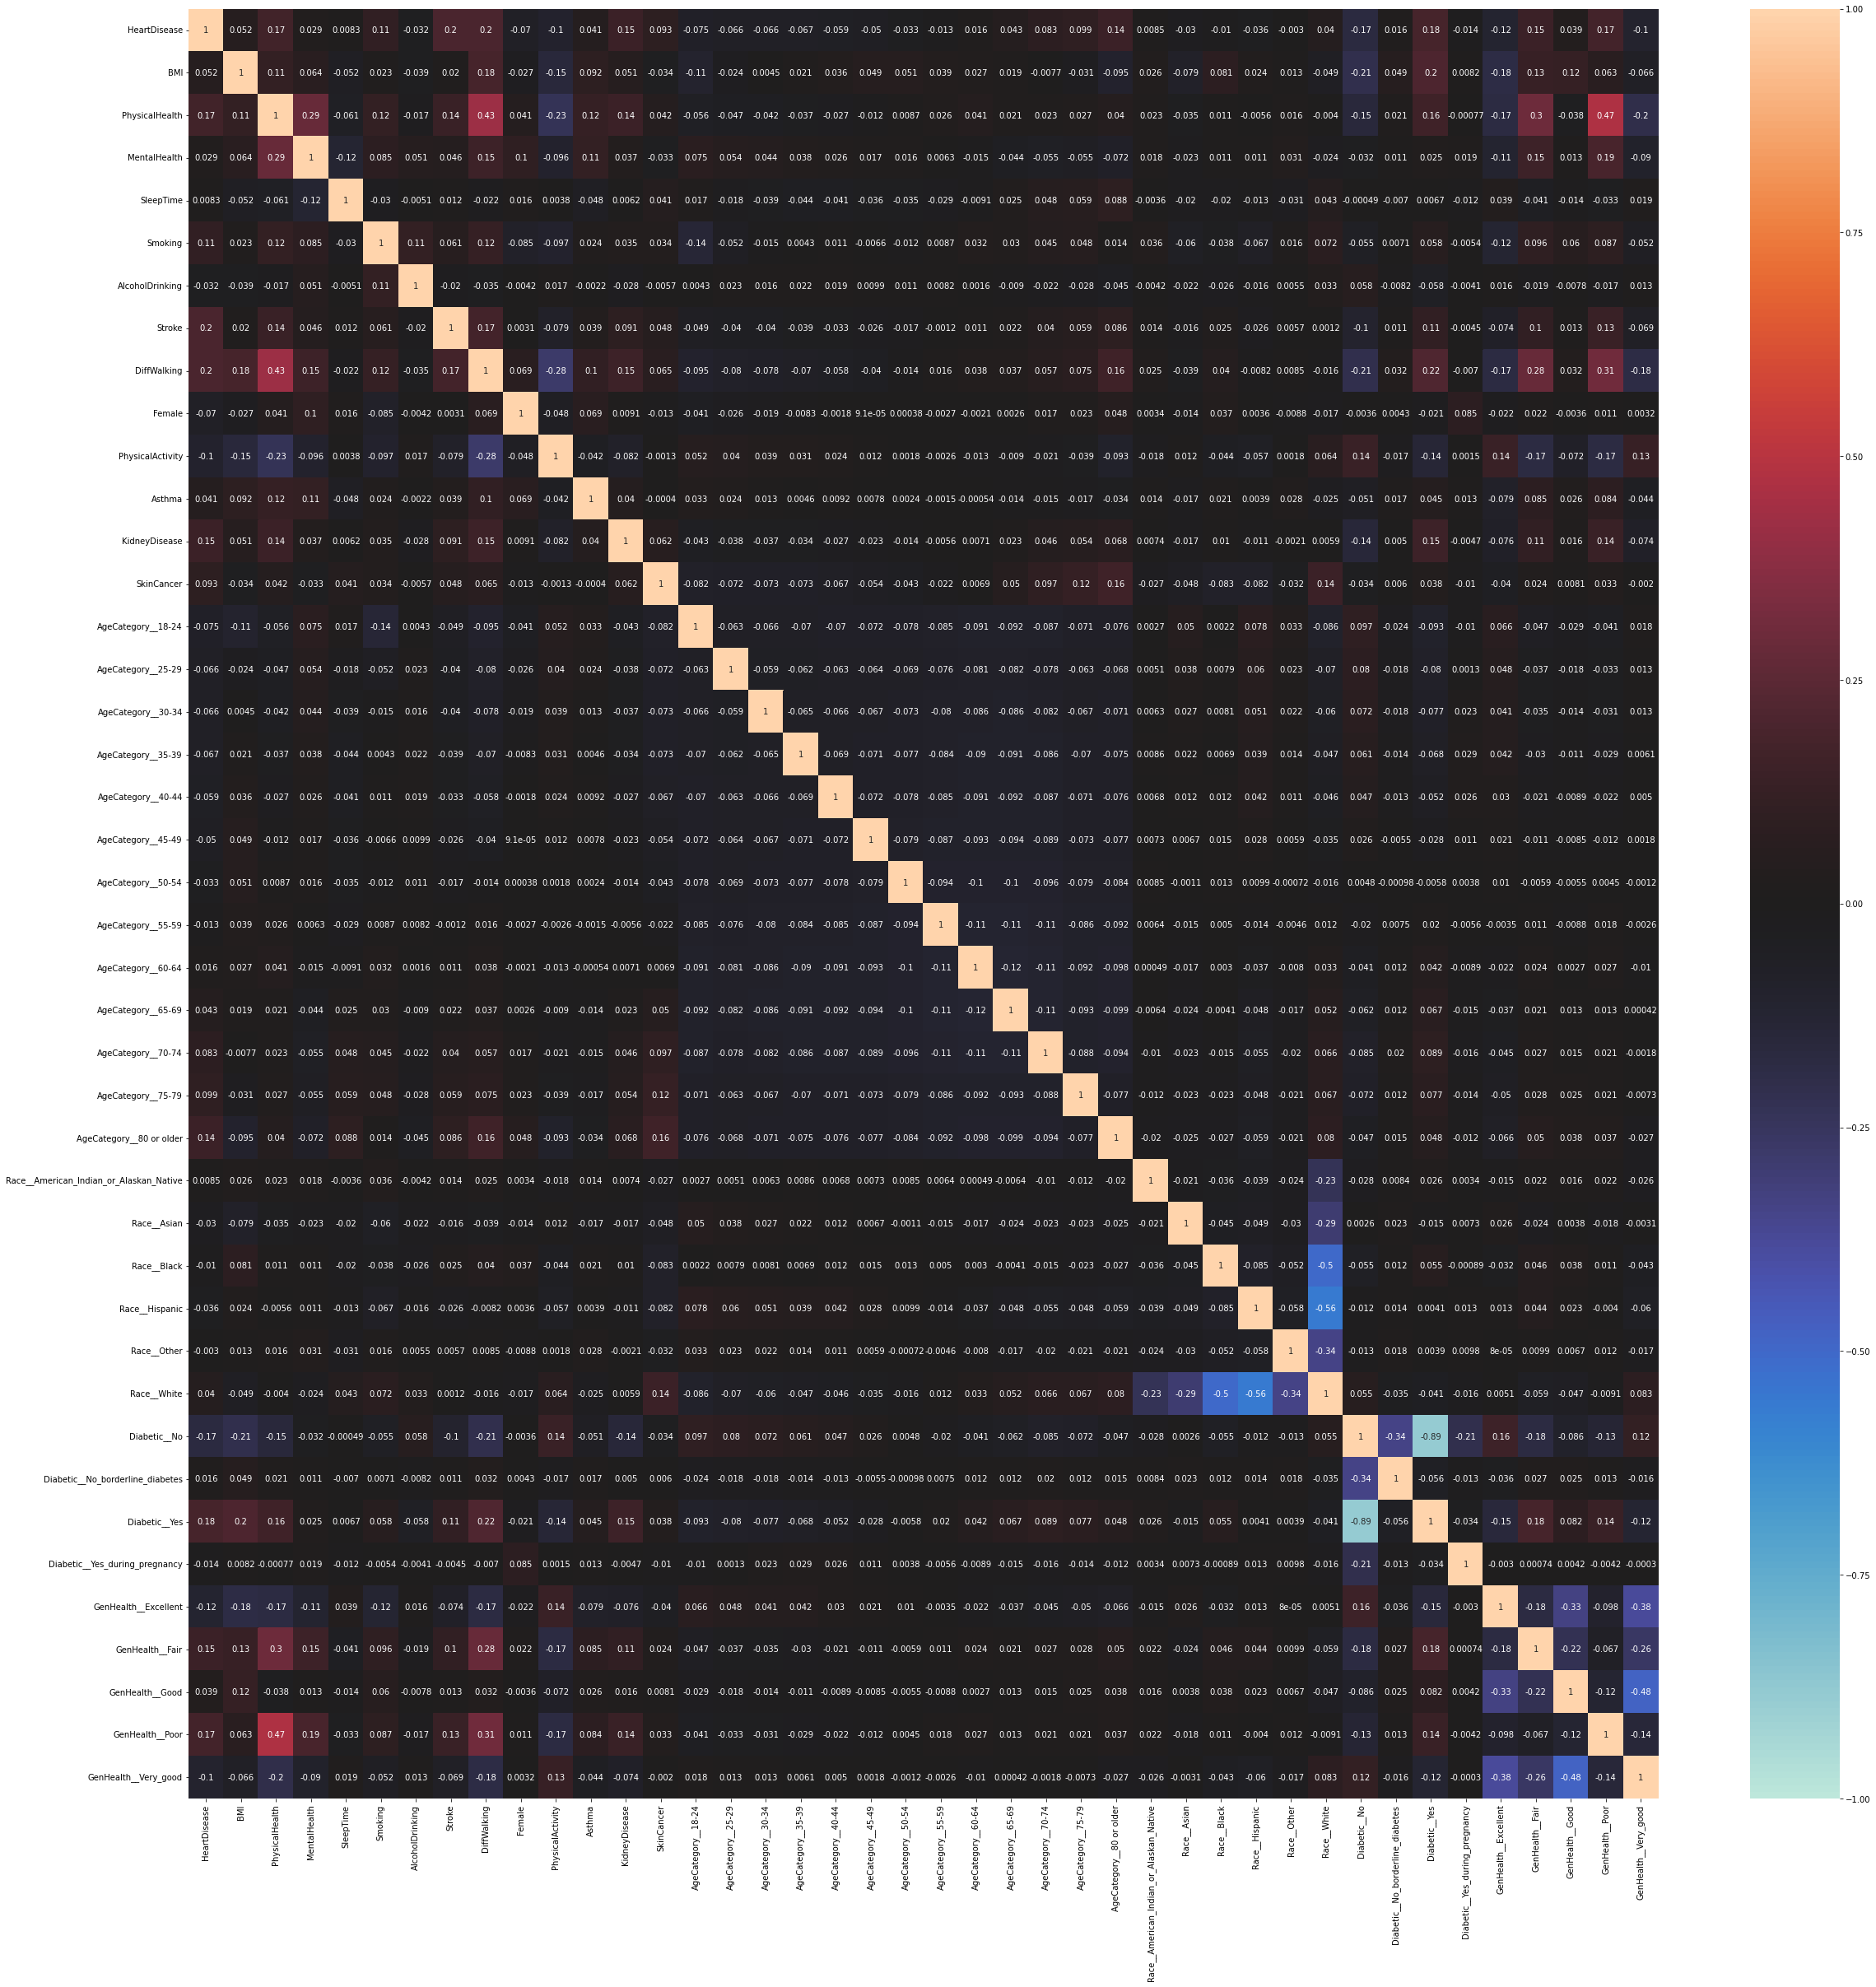

In [ ]:
# plot correlation matrix
plt.figure(figsize = (40,40))
corr = df_ohe.corr()
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0)

In [ ]:
# Find largest values in correlation matrix 

corr = np.array(df_ohe.corr())
ind = np.argwhere(np.logical_or(corr > .15, corr < -.15))
columns = df_ohe.columns
d = []
for i in ind:
    if i[0] > i[1]:
        attr1 = columns[i[0]]
        attr2 = columns[i[1]]
        if attr1.split('__')[0] != attr2.split('__')[0]:
            d.append({'attr1': attr1, 'attr2': attr2, 'correlation': corr[i[0], i[1]]})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pd.DataFrame(d))

,attr1,attr2,correlation
0,PhysicalHealth,HeartDisease,0.170721
1,MentalHealth,PhysicalHealth,0.287987
2,Stroke,HeartDisease,0.196835
3,DiffWalking,HeartDisease,0.201258
4,DiffWalking,BMI,0.181678
5,DiffWalking,PhysicalHealth,0.428373
6,DiffWalking,MentalHealth,0.152235
7,DiffWalking,Stroke,0.174143
8,PhysicalActivity,BMI,-0.150616
9,PhysicalActivity,PhysicalHealth,-0.232283


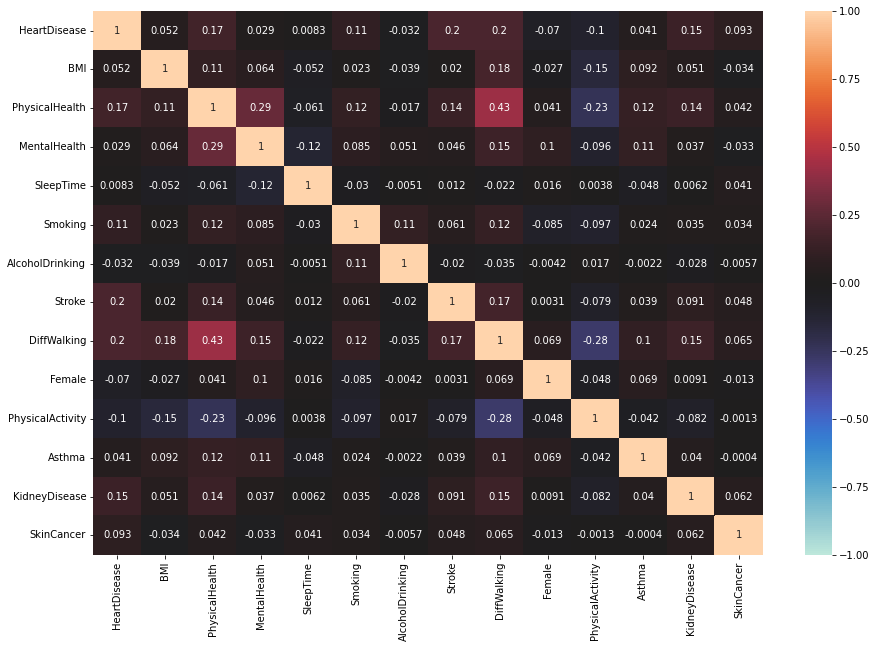

In [8]:
# easier to read correlation matrix without one hot encoded values, since one-hot encoded values give unnecessary values 

columns = [
    'HeartDisease',	
    'BMI',
    'PhysicalHealth',
    'MentalHealth',
    'SleepTime',
    'Smoking',
    'AlcoholDrinking',
    'Stroke',
    'DiffWalking',
    'Female',
    'PhysicalActivity',	
    'Asthma',	
    'KidneyDisease',	
    'SkinCancer'
]

corr2 = df_ohe[columns].corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr2, annot = True, vmin=-1, vmax=1, center= 0)

# Splitting into Train and Test set

In [ ]:
# Split into 90% Train and 10% Test

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_ohe, test_size=0.1, random_state=0)

X_train, y_train = train.copy().drop(columns=['HeartDisease']), train['HeartDisease']
X_test, y_test = test.copy().drop(columns=['HeartDisease']), test['HeartDisease']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(287815, 41) (287815,) (31980, 41) (31980,)


# Logistic Regression

### Training Results ###

              precision    recall  f1-score   support

           0       0.92      0.99      0.96    263192
           1       0.55      0.11      0.18     24623

    accuracy                           0.92    287815
   macro avg       0.73      0.55      0.57    287815
weighted avg       0.89      0.92      0.89    287815
 



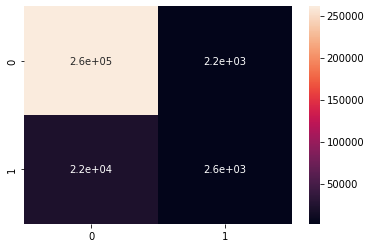


### Testing Results ###

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     29230
           1       0.52      0.10      0.17      2750

    accuracy                           0.91     31980
   macro avg       0.72      0.55      0.56     31980
weighted avg       0.89      0.91      0.89     31980
 



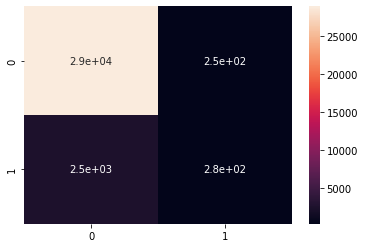

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

log_reg = LogisticRegression(solver='lbfgs', max_iter=300)
log_reg.fit(X_train, y_train)
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

print("### Training Results ###\n")
print(classification_report(y_train, y_train_pred), '\n')
matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(matrix, annot=True)
plt.show()
print()

print("### Testing Results ###\n")
print(classification_report(y_test, y_test_pred), '\n')
matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matrix, annot=True)
plt.show()
print()

# Decision Tree Classifier

### Training Results ###

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    263192
           1       1.00      0.96      0.98     24623

    accuracy                           1.00    287815
   macro avg       1.00      0.98      0.99    287815
weighted avg       1.00      1.00      1.00    287815
 



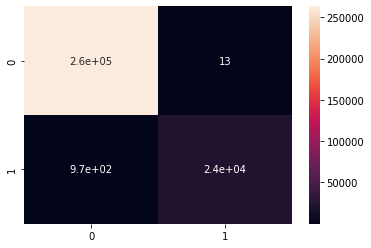


### Testing Results ###

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     29230
           1       0.23      0.25      0.24      2750

    accuracy                           0.86     31980
   macro avg       0.58      0.58      0.58     31980
weighted avg       0.87      0.86      0.87     31980
 



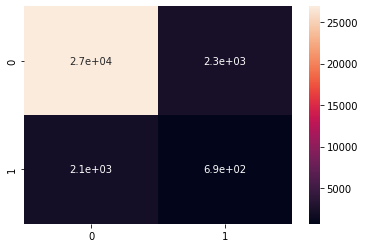

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("### Training Results ###\n")
print(classification_report(y_train, y_train_pred), '\n')
matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(matrix, annot=True)
plt.show()
print()

print("### Testing Results ###\n")
print(classification_report(y_test, y_test_pred), '\n')
matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matrix, annot=True)
plt.show()
print()

# SVM

### Training Results ###

              precision    recall  f1-score   support

           0       0.91      1.00      0.96    263192
           1       1.00      0.00      0.00     24623

    accuracy                           0.91    287815
   macro avg       0.96      0.50      0.48    287815
weighted avg       0.92      0.91      0.87    287815
 



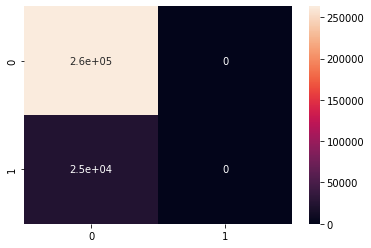


### Testing Results ###

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     29230
           1       1.00      0.00      0.00      2750

    accuracy                           0.91     31980
   macro avg       0.96      0.50      0.48     31980
weighted avg       0.92      0.91      0.87     31980
 



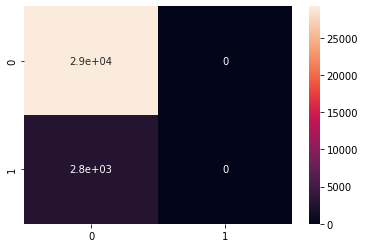

0    287815
dtype: int64

0    31980
dtype: int64

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model = SVC(kernel='linear')

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("### Training Results ###\n")
print(classification_report(y_train, y_train_pred, zero_division=1), '\n')
matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(matrix, annot=True)
plt.show()
print()

print("### Testing Results ###\n")
print(classification_report(y_test, y_test_pred, zero_division=1), '\n')
matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matrix, annot=True)
plt.show()
print()

display(pd.Series(y_train_pred).value_counts())
display(pd.Series(y_test_pred).value_counts())

# Naive Bayes

In [ ]:
# Additional Preprocessing for Naive Bayes Classifer
# Ordinal Encoding

from sklearn.preprocessing import OrdinalEncoder

df_ord = df.copy()
encoder = OrdinalEncoder()
columns = [
    'AgeCategory',
    'Race',	
    'Diabetic',	
    'GenHealth'
]
df_ord[columns] = pd.DataFrame(encoder.fit_transform(df_ord[columns]), columns=columns)

df_ord.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Female,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,AgeCategory,Race,Diabetic,GenHealth
0,0,0.055294,0.100000,1.0,0.173913,1,0,0,0,1,1,1,0,1,7.0,5.0,2.0,4.0
1,0,0.100447,0.000000,0.0,0.260870,0,0,1,0,1,1,0,0,0,12.0,5.0,0.0,4.0
2,0,0.175782,0.666667,1.0,0.304348,1,0,0,0,0,1,1,0,0,9.0,5.0,2.0,1.0
3,0,0.147169,0.000000,0.0,0.217391,0,0,0,0,1,0,0,0,1,11.0,5.0,0.0,2.0
4,0,0.141132,0.933333,0.0,0.304348,0,0,0,1,1,1,0,0,0,4.0,5.0,0.0,4.0


In [ ]:
# Split into Train and Test set

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_ord, test_size=0.1, random_state=0)

X_train_bayes, y_train_bayes = train.copy().drop(columns=['HeartDisease']), train['HeartDisease']
X_test_bayes, y_test_bayes = test.copy().drop(columns=['HeartDisease']), test['HeartDisease']

print(X_train_bayes.shape, y_train_bayes.shape, X_test_bayes.shape, y_test_bayes.shape)

(287815, 17) (287815,) (31980, 17) (31980,)


### Training Results ###

              precision    recall  f1-score   support

           0       0.94      0.93      0.94    263192
           1       0.35      0.38      0.36     24623

    accuracy                           0.89    287815
   macro avg       0.64      0.66      0.65    287815
weighted avg       0.89      0.89      0.89    287815
 



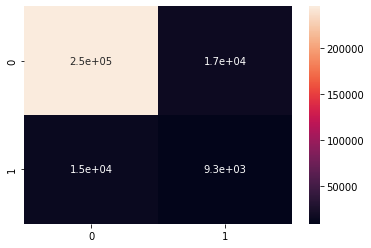


### Testing Results ###

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     29230
           1       0.35      0.37      0.36      2750

    accuracy                           0.89     31980
   macro avg       0.64      0.65      0.65     31980
weighted avg       0.89      0.89      0.89     31980
 



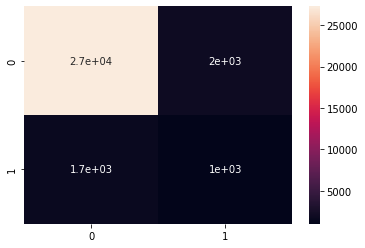

In [ ]:
# Naive Bayes with categorical attributes
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report

columns = [
    'Smoking',
    'AlcoholDrinking',
    'Stroke',
    'DiffWalking',
    'Female',
    'PhysicalActivity',	
    'Asthma',	
    'KidneyDisease',	
    'SkinCancer',
    'AgeCategory',
    'Race',	
    'Diabetic',	
    'GenHealth'
]

model = CategoricalNB()

model.fit(X_train_bayes[columns], np.asarray(y_train_bayes))

y_train_pred = model.predict(X_train_bayes[columns])
y_test_pred = model.predict(X_test_bayes[columns])

print("### Training Results ###\n")
print(classification_report(y_train_bayes, y_train_pred), '\n')
matrix = confusion_matrix(y_train_bayes, y_train_pred)
sns.heatmap(matrix, annot=True)
plt.show()
print()

print("### Testing Results ###\n")
print(classification_report(y_test_bayes, y_test_pred), '\n')
matrix = confusion_matrix(y_test_bayes, y_test_pred)
sns.heatmap(matrix, annot=True)
plt.show()
print()

### Training Results ###

              precision    recall  f1-score   support

           0       0.93      0.93      0.93    263192
           1       0.23      0.21      0.22     24623

    accuracy                           0.87    287815
   macro avg       0.58      0.57      0.57    287815
weighted avg       0.87      0.87      0.87    287815
 



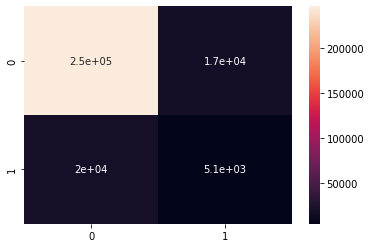


### Testing Results ###

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     29230
           1       0.22      0.21      0.22      2750

    accuracy                           0.87     31980
   macro avg       0.57      0.57      0.57     31980
weighted avg       0.87      0.87      0.87     31980
 



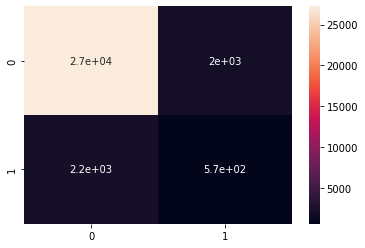

In [ ]:
# Naive Bayes with numerical attributes
from sklearn.naive_bayes import GaussianNB

columns = [
    'BMI',
    'PhysicalHealth',
    'MentalHealth',
    'SleepTime'
]

model = GaussianNB()

model.fit(X_train_bayes[columns], np.asarray(y_train_bayes))

y_train_pred = model.predict(X_train_bayes[columns])
y_test_pred = model.predict(X_test_bayes[columns])

print("### Training Results ###\n")
print(classification_report(y_train_bayes, y_train_pred), '\n')
matrix = confusion_matrix(y_train_bayes, y_train_pred)
sns.heatmap(matrix, annot=True)
plt.show()
print()

print("### Testing Results ###\n")
print(classification_report(y_test_bayes, y_test_pred), '\n')
matrix = confusion_matrix(y_test_bayes, y_test_pred)
sns.heatmap(matrix, annot=True)
plt.show()
print()

# Neural Network

In [ ]:
# Deep neural network model
# Create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
from keras import backend as K

def create_model():
    
    model = Sequential(name='classifier')

    model.add(Dense(32, input_dim=41, activation="relu", name="layer1"))
    model.add(Dense(32, activation="relu", name="layer2"))
    model.add(Dense(1, activation="sigmoid"))

    opt = Adam(learning_rate=0.01)

    # Configure and compile the model
    model.compile(
        loss='binary_crossentropy',
        optimizer=opt,
        metrics=['accuracy']
    )
    
    return model

model = create_model()

In [ ]:
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size=32)

Epoch 1/5
8095/8095 [==============================] - 18s 2ms/step - loss: 0.2304 - accuracy: 0.9145 - val_loss: 0.2246 - val_accuracy: 0.9170
Epoch 2/5
8095/8095 [==============================] - 23s 3ms/step - loss: 0.2282 - accuracy: 0.9152 - val_loss: 0.2242 - val_accuracy: 0.9165
Epoch 3/5
8095/8095 [==============================] - 37s 5ms/step - loss: 0.2278 - accuracy: 0.9154 - val_loss: 0.2238 - val_accuracy: 0.9180
Epoch 4/5
8095/8095 [==============================] - 27s 3ms/step - loss: 0.2275 - accuracy: 0.9157 - val_loss: 0.2294 - val_accuracy: 0.9175
Epoch 5/5
8095/8095 [==============================] - 17s 2ms/step - loss: 0.2273 - accuracy: 0.9157 - val_loss: 0.2251 - val_accuracy: 0.9162


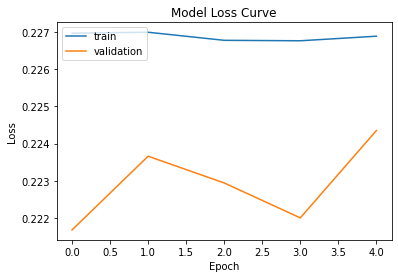

In [ ]:
def plot_loss():
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss Curve')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_loss()

### Training Results ###

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    263192
           1       0.50      0.17      0.26     24623

    accuracy                           0.91    287815
   macro avg       0.72      0.58      0.61    287815
weighted avg       0.89      0.91      0.89    287815
 



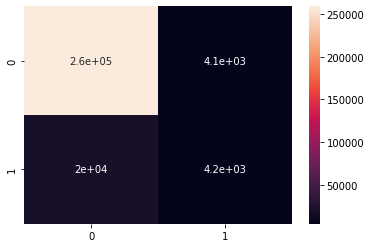


### Testing Results ###

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     29230
           1       0.50      0.16      0.24      2750

    accuracy                           0.91     31980
   macro avg       0.71      0.57      0.60     31980
weighted avg       0.89      0.91      0.89     31980
 



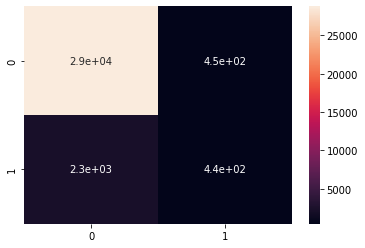

In [ ]:
thresh = 0.5
y_train_pred = (model.predict(X_train) > thresh) * 1
y_test_pred = (model.predict(X_test) > thresh) * 1

print("### Training Results ###\n")
print(classification_report(y_train, y_train_pred), '\n')
matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(matrix, annot=True)
plt.show()
print()

print("### Testing Results ###\n")
print(classification_report(y_test, y_test_pred), '\n')
matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matrix, annot=True)
plt.show()
print()

# K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, accuracy_score

X, y = np.array(df_ohe.copy().drop(columns=['HeartDisease'])), np.array(df_ohe['HeartDisease'])
thresh = 0.5

acc_per_fold = []
mse_per_fold = []
fold_num = 1

# K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

for train, test in kfold.split(X, y):
    # Train on different folds
    model = create_model()
    hist = model.fit(X[train], y[train], epochs=5, batch_size=32, verbose=0)
    y_pred = model.predict(X[test])
    test = y[test]
    pred = (y_pred > thresh) * 1
    mse = mean_squared_error(pred,test)
    acc = accuracy_score(pred,test)
    print(f'Fold {fold_num} - MSE: {mse}; Acc: {acc}%')
    acc_per_fold.append(acc)
    mse_per_fold.append(mse)
    # Next fold number
    fold_num = fold_num + 1
    
print(f'Average - MSE: {np.average(mse_per_fold)}; Acc: {np.average(acc_per_fold)}%')

Fold 1 - MSE: 0.08322519113807282; Acc: 0.9167748088619272%
Fold 2 - MSE: 0.08571115871104927; Acc: 0.9142888412889507%
Fold 3 - MSE: 0.08313138104097938; Acc: 0.9168686189590206%
Fold 4 - MSE: 0.0840382119795494; Acc: 0.9159617880204506%
Fold 5 - MSE: 0.08607076408324082; Acc: 0.9139292359167591%
Average - MSE: 0.08443534139057834; Acc: 0.9155646586094216%


# Hyperparameter Tuning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras import backend as K

def create_tunable_model(layers, hidden_layer_nodes, learning_rate, dropout, l2reg):
    
    model = Sequential(name='classifier')

    for i in range(layers):
        if i == 0:
            if l2reg:
                model.add(
                    Dense(
                        hidden_layer_nodes, 
                        input_dim=41, 
                        activation="relu", 
                        kernel_regularizer=L2(1e-4), 
                        bias_regularizer=L2(1e-4), 
                        name=f"layer{i}"
                    ))
            else:
                model.add(
                    Dense(
                        hidden_layer_nodes,  
                        input_dim=41, 
                        activation="relu", 
                        name=f"layer{i}"
                    ))
        else:       
            if l2reg:
                model.add(
                    Dense(
                        hidden_layer_nodes,  
                        activation="relu", 
                        kernel_regularizer=L2(1e-4), 
                        bias_regularizer=L2(1e-4), 
                        name=f"layer{i}"
                    ))
            else:
                model.add(
                    Dense(
                        hidden_layer_nodes,  
                        activation="relu", 
                        name=f"layer{i}"
                    ))

        if dropout:
            model.add(Dropout(0.2))    
    
    model.add(Dense(1, activation="sigmoid"))

    opt = Adam(learning_rate=learning_rate)

    # Configure and compile the model
    model.compile(
        loss='binary_crossentropy',
        optimizer=opt,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

X, y = np.array(df_ohe.copy().drop(columns=['HeartDisease'])), np.array(df_ohe['HeartDisease'])

model = KerasClassifier(build_fn=create_tunable_model, verbose=0)
param_grid = dict(
    layers=[1, 2, 3], 
    hidden_layer_nodes=[32, 16], 
    learning_rate=[0.01, 0.001], 
    dropout=[True, False], 
    l2reg=[True, False], 
    epochs=[1,3],
    batch_size=[32]
)

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv=5)
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Best: 0.916290 using {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 1, 'learning_rate': 0.001}
0.915677 (0.001812) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 1, 'learning_rate': 0.01}
0.915843 (0.001820) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 1, 'learning_rate': 0.001}
0.915130 (0.001878) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 2, 'learning_rate': 0.01}
0.916009 (0.001826) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 2, 'learning_rate': 0.001}
0.914749 (0.002039) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 3, 'learning_rate': 0.01}
0.915705 (0.001619) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_

  Best: 0.916290 using {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 1, 'learning_rate': 0.001}
  0.915677 (0.001812) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 1, 'learning_rate': 0.01}
  0.915843 (0.001820) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 1, 'learning_rate': 0.001}
  0.915130 (0.001878) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 2, 'learning_rate': 0.01}
  0.916009 (0.001826) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 2, 'learning_rate': 0.001}
  0.914749 (0.002039) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 3, 'learning_rate': 0.01}
  0.915705 (0.001619) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 3, 'learning_rate': 0.001}
  0.915418 (0.001552) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 1, 'learning_rate': 0.01}
  0.915984 (0.001924) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 1, 'learning_rate': 0.001}
  0.915571 (0.001844) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 2, 'learning_rate': 0.01}
  0.915737 (0.001746) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 2, 'learning_rate': 0.001}
  0.915017 (0.001479) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 3, 'learning_rate': 0.01}
  0.915508 (0.001856) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 3, 'learning_rate': 0.001}
  0.915189 (0.001946) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 1, 'learning_rate': 0.01}
  0.915893 (0.001879) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 1, 'learning_rate': 0.001}
  0.915005 (0.002056) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 2, 'learning_rate': 0.01}
  0.915183 (0.001506) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 2, 'learning_rate': 0.001}
  0.914567 (0.001852) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 3, 'learning_rate': 0.01}
  0.914733 (0.001837) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 3, 'learning_rate': 0.001}
  0.915490 (0.002077) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 1, 'learning_rate': 0.01}
  0.915721 (0.001858) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 1, 'learning_rate': 0.001}
  0.915249 (0.001836) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 2, 'learning_rate': 0.01}
  0.915724 (0.001834) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 2, 'learning_rate': 0.001}
  0.914408 (0.001791) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 3, 'learning_rate': 0.01}
  0.914839 (0.001706) with: {'batch_size': 32, 'dropout': True, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 3, 'learning_rate': 0.001}
  0.915662 (0.002049) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 1, 'learning_rate': 0.01}
  0.916018 (0.001729) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 1, 'learning_rate': 0.001}
  0.915196 (0.002153) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 2, 'learning_rate': 0.01}
  0.915583 (0.001518) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 2, 'learning_rate': 0.001}
  0.914802 (0.001904) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 3, 'learning_rate': 0.01}
  0.915805 (0.002000) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 3, 'learning_rate': 0.001}
  0.915302 (0.001933) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 1, 'learning_rate': 0.01}
  0.916290 (0.001815) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 1, 'learning_rate': 0.001}
  0.914986 (0.001731) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 2, 'learning_rate': 0.01}
  0.915899 (0.001641) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 2, 'learning_rate': 0.001}
  0.915465 (0.002475) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 3, 'learning_rate': 0.01}
  0.915421 (0.002001) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 3, 'learning_rate': 0.001}
  0.915721 (0.001938) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 1, 'learning_rate': 0.01}
  0.915946 (0.001748) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 1, 'learning_rate': 0.001}
  0.914845 (0.001515) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 2, 'learning_rate': 0.01}
  0.915677 (0.002186) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 2, 'learning_rate': 0.001}
  0.914455 (0.001750) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 3, 'learning_rate': 0.01}
  0.915118 (0.001554) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 3, 'learning_rate': 0.001}
  0.915949 (0.002087) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 1, 'learning_rate': 0.01}
  0.916059 (0.001986) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 1, 'learning_rate': 0.001}
  0.915080 (0.002224) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 2, 'learning_rate': 0.01}
  0.915652 (0.001953) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 2, 'learning_rate': 0.001}
  0.914455 (0.001850) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 3, 'learning_rate': 0.01}
  0.915293 (0.001818) with: {'batch_size': 32, 'dropout': True, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 3, 'learning_rate': 0.001}
  0.915264 (0.002131) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 1, 'learning_rate': 0.01}
  0.915821 (0.001927) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 1, 'learning_rate': 0.001}
  0.915674 (0.001680) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 2, 'learning_rate': 0.01}
  0.915840 (0.001759) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 2, 'learning_rate': 0.001}
  0.914830 (0.002200) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 3, 'learning_rate': 0.01}
  0.915931 (0.001620) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 3, 'learning_rate': 0.001}
  0.915668 (0.001665) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 1, 'learning_rate': 0.01}
  0.915949 (0.002078) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 1, 'learning_rate': 0.001}
  0.915458 (0.001696) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 2, 'learning_rate': 0.01}
  0.915880 (0.002013) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 2, 'learning_rate': 0.001}
  0.915264 (0.001859) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 3, 'learning_rate': 0.01}
  0.915949 (0.001561) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 3, 'learning_rate': 0.001}
  0.914824 (0.001627) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 1, 'learning_rate': 0.01}
  0.915777 (0.001805) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 1, 'learning_rate': 0.001}
  0.914742 (0.001642) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 2, 'learning_rate': 0.01}
  0.915956 (0.001750) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 2, 'learning_rate': 0.001}
  0.914405 (0.001790) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 3, 'learning_rate': 0.01}
  0.915837 (0.001869) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 3, 'learning_rate': 0.001}
  0.915433 (0.001633) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 1, 'learning_rate': 0.01}
  0.915818 (0.001945) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 1, 'learning_rate': 0.001}
  0.915593 (0.002359) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 2, 'learning_rate': 0.01}
  0.915805 (0.002036) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 2, 'learning_rate': 0.001}
  0.915174 (0.001980) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 3, 'learning_rate': 0.01}
  0.915815 (0.001944) with: {'batch_size': 32, 'dropout': False, 'epochs': 1, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 3, 'learning_rate': 0.001}
  0.914742 (0.002067) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 1, 'learning_rate': 0.01}
  0.916162 (0.001729) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 1, 'learning_rate': 0.001}
  0.915340 (0.002033) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 2, 'learning_rate': 0.01}
  0.915905 (0.001768) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 2, 'learning_rate': 0.001}
  0.914820 (0.002155) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 3, 'learning_rate': 0.01}
  0.915774 (0.001796) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': True, 'layers': 3, 'learning_rate': 0.001}
  0.915655 (0.001754) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 1, 'learning_rate': 0.01}
  0.916106 (0.001891) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 1, 'learning_rate': 0.001}
  0.915931 (0.001983) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 2, 'learning_rate': 0.01}
  0.915918 (0.001670) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 2, 'learning_rate': 0.001}
  0.915627 (0.001856) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 3, 'learning_rate': 0.01}
  0.915987 (0.001778) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 32, 'l2reg': False, 'layers': 3, 'learning_rate': 0.001}
  0.914933 (0.001734) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 1, 'learning_rate': 0.01}
  0.915809 (0.001835) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 1, 'learning_rate': 0.001}
  0.915074 (0.002130) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 2, 'learning_rate': 0.01}
  0.916165 (0.001778) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 2, 'learning_rate': 0.001}
  0.915252 (0.002180) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 3, 'learning_rate': 0.01}
  0.916156 (0.001804) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': True, 'layers': 3, 'learning_rate': 0.001}
  0.916012 (0.001854) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 1, 'learning_rate': 0.01}
  0.916084 (0.001712) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 1, 'learning_rate': 0.001}
  0.915343 (0.001873) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 2, 'learning_rate': 0.01}
  0.916190 (0.001952) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 2, 'learning_rate': 0.001}
  0.915483 (0.002179) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 3, 'learning_rate': 0.01}
  0.916012 (0.001898) with: {'batch_size': 32, 'dropout': False, 'epochs': 3, 'hidden_layer_nodes': 16, 'l2reg': False, 'layers': 3, 'learning_rate': 0.001}


# Optimized Neural Network Model

In [ ]:
def create_model():
    
    model = Sequential(name='classifier')

    model.add(Dense(50, input_dim=41, activation="relu", name="layer1"))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation="sigmoid"))

    opt = Adam(learning_rate=0.0001)

    # Configure and compile the model
    model.compile(
        loss='binary_crossentropy',
        optimizer=opt,
        metrics=['accuracy']
    )
    
    return model

model = create_model()

In [ ]:
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=8, batch_size=32)

Epoch 1/8
8095/8095 [==============================] - 16s 2ms/step - loss: 0.2603 - accuracy: 0.9087 - val_loss: 0.2240 - val_accuracy: 0.9178
Epoch 2/8
8095/8095 [==============================] - 15s 2ms/step - loss: 0.2308 - accuracy: 0.9152 - val_loss: 0.2228 - val_accuracy: 0.9183
Epoch 3/8
8095/8095 [==============================] - 16s 2ms/step - loss: 0.2294 - accuracy: 0.9158 - val_loss: 0.2222 - val_accuracy: 0.9181
Epoch 4/8
8095/8095 [==============================] - 16s 2ms/step - loss: 0.2287 - accuracy: 0.9159 - val_loss: 0.2220 - val_accuracy: 0.9179
Epoch 5/8
8095/8095 [==============================] - 16s 2ms/step - loss: 0.2280 - accuracy: 0.9161 - val_loss: 0.2221 - val_accuracy: 0.9185
Epoch 6/8
8095/8095 [==============================] - 19s 2ms/step - loss: 0.2280 - accuracy: 0.9160 - val_loss: 0.2218 - val_accuracy: 0.9178
Epoch 7/8
8095/8095 [==============================] - 16s 2ms/step - loss: 0.2278 - accuracy: 0.9160 - val_loss: 0.2217 - val_accuracy:

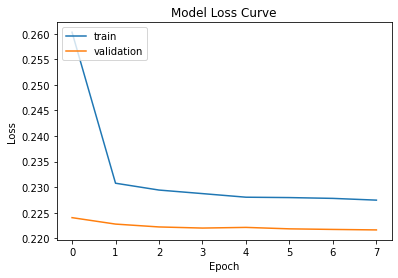

In [ ]:
def plot_loss():
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss Curve')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_loss()

### Training Results ###

              precision    recall  f1-score   support

           0       0.92      0.99      0.96    263192
           1       0.59      0.08      0.14     24623

    accuracy                           0.92    287815
   macro avg       0.76      0.54      0.55    287815
weighted avg       0.89      0.92      0.89    287815
 



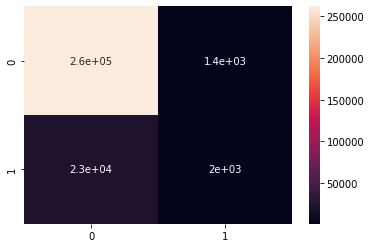


### Testing Results ###

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     29230
           1       0.58      0.08      0.14      2750

    accuracy                           0.92     31980
   macro avg       0.75      0.54      0.55     31980
weighted avg       0.89      0.92      0.89     31980
 



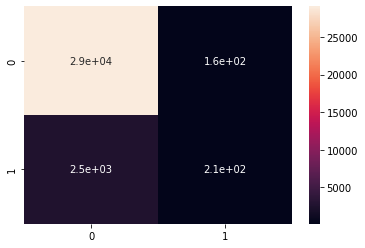

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

thresh = 0.5
y_train_pred = (model.predict(X_train) > thresh) * 1
y_test_pred = (model.predict(X_test) > thresh) * 1

print("### Training Results ###\n")
print(classification_report(y_train, y_train_pred), '\n')
matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(matrix, annot=True)
plt.show()
print()

print("### Testing Results ###\n")
print(classification_report(y_test, y_test_pred), '\n')
matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matrix, annot=True)
plt.show()
print()

In [ ]:
model.save("/content/drive/Shared drives/ECS171 Group Project Team 11/best_model")

INFO:tensorflow:Assets written to: /content/drive/Shared drives/ECS171 Group Project Team 11/best_model/assets
